# Homework 1  

by 邱聖傑(109022125)  

## Wrtten Assignments

### 1
#### Problem
Evaluate the general solutions of the below ODEs:  
(a)  $m\ddot{x} + k\dot{x} = 0$  
(b)  $m\ddot{x} + \lambda\dot{x} + kx = 0$  
(c)  $m\ddot{x} + \lambda\dot{x} + kx = F_0\cos(\omega_f t)$  

#### Solution

##### (a)
The equation is equivalent to 
$$
\ddot{x} + \omega_0^2 x = 0
$$
, where $\omega_0 = \sqrt{\frac{k}{m}}$.  
Solving this differential equation, we get
$$
x(t) = A\cos(\omega_0 t) + B\sin(\omega_0 t)
$$.

##### (b)
The equation is equivalent to 
$$
\ddot{x} + 2\gamma\dot{x} + \omega_0^2 x = 0
$$
, where $\gamma = \frac{\lambda}{2m}$ and $\omega_0 = \sqrt{\frac{k}{m}}$.  
Solving this differential equation, we get 
$$x(t) = e^{-\gamma t}(A\cos(\omega_1 t + \phi))$$
when $\omega_1 = \sqrt{\omega_0^2 - \gamma^2} \neq 0$.  
And
$$x(t) = (A + Bt)e^{-\gamma t}$$
when $\omega_1 = 0$.

##### (c)
The equation is equivalent to
$$
\ddot{x} + 2\gamma\dot{x} + \omega_0^2 x = f\cos(\omega_f t)
$$
, where $\gamma = \frac{\lambda}{2m}$, $\omega_0 = \sqrt{\frac{k}{m}}$ and $f = \frac{F_0}{m}$.  
Solvin this differential equation, we get
$$x(t) = \frac{f}{\sqrt{(\omega_0^2 - \omega_f^2)^2 + 4\gamma^2\omega_f^2}}\cos(\omega_f t - \delta) + x_c(t)$$
, where $x_c(t)$ is the complementary solution of Part (b).

## Programming Assignments

### Problem 1

In [2]:
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
import solver as mysolver             # your own solver

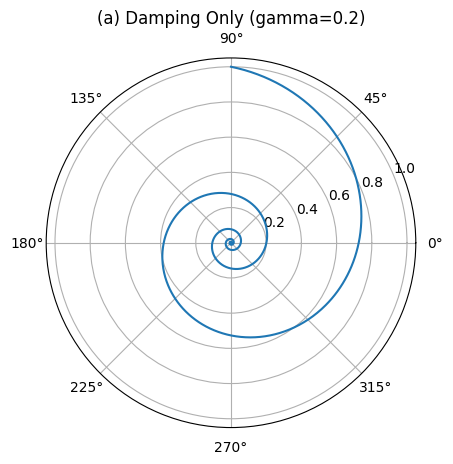

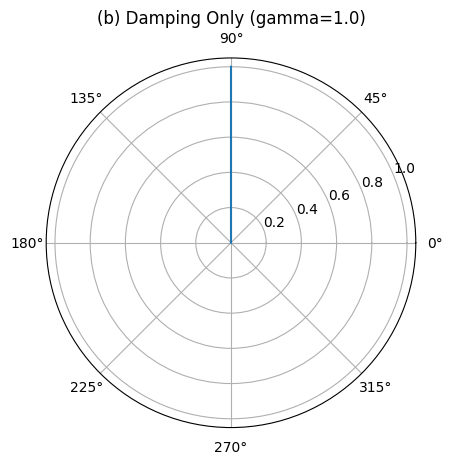

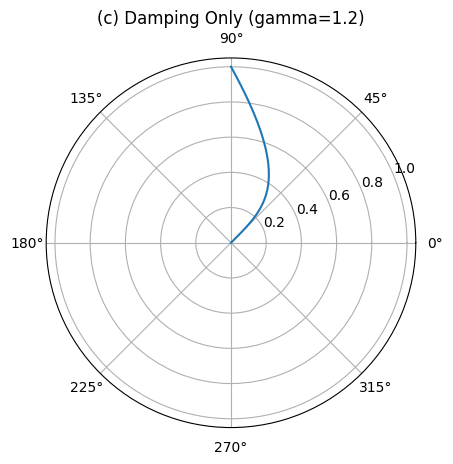

In [3]:
A = 1
M = 1
W0 = 1
dt = 0.01
T = np.arange(0, 50, dt)

def analytic_damped_solution(T, v0, gamma, W0):
    r = gamma/W0

    if r < 1:
        W1 = np.sqrt(1 - r**2)*W0
        A = np.sqrt(v0**2 + (r*W0)**2)
        return A*np.exp(-r*W0*T)*np.sin(W1*T)
    elif r == 1:
        return v0*T*np.exp(-W0*T)
    else:
        A = np.sqrt(v0**2 + (r*W0)**2)
        W1 = np.sqrt(r**2 - 1)*W0
        return A*np.exp(-r*W0*T)*np.sinh(W1*T)


def simulate_oscillator(gamma, drive_force=None):
    y0 = np.array([0, A*W0])

    def force_fn(t, y, gamma):
        x = y[0]
        v = y[1]
        a = -2*gamma*v - W0*W0*x
        if drive_force is not None:
            a += drive_force(t)
        return np.array([v, a])

    return mysolver.solve_ivp(force_fn, (T[0], T[-1]), y0, method="RK4", t_eval=T, args=[gamma])
    # return solver_scipy(force_fn, (T[0], T[-1]), y0, method="RK45", t_eval=T, args=[gamma]).y

def plot_phase_diagram(name, Y: np.ndarray, gamma):
    X = Y[0, :]
    V = Y[1, :]

    W1 = np.sqrt(abs(W0**2 - gamma**2))

    U = W1 * X
    W = gamma*X + V

    plt.figure()
    # polar axis, show angle in radian
    plt.polar(np.arctan2(W, U), np.sqrt(U**2 + W**2))
    # plt.plot(T, X, label="x")
    # Xa = analytic_damped_solution(T, Y[1, 0], gamma, W0)
    # plt.plot(T, Xa, label="x analytic")
    # plt.legend()

    plt.title(name)

    # plt.savefig(f"{name}.png")
    plt.show()

# only damping
Y1a = simulate_oscillator(0.2)
Y1b = simulate_oscillator(1.0)
Y1c = simulate_oscillator(1.2)

plot_phase_diagram("(a) Damping Only (gamma=0.2)", Y1a, 0.2)
plot_phase_diagram("(b) Damping Only (gamma=1.0)", Y1b, 1.0)
plot_phase_diagram("(c) Damping Only (gamma=1.2)", Y1c, 1.2)

#### Problem 2

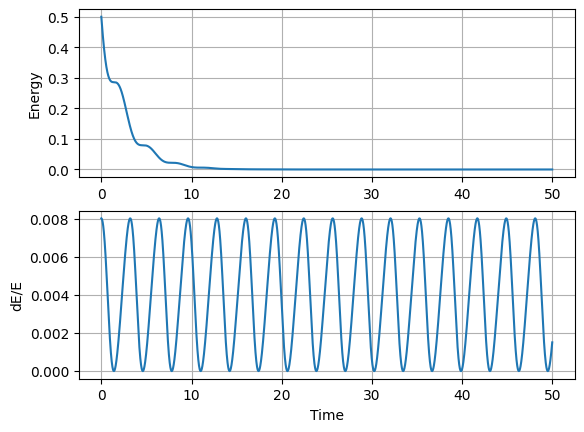

In [4]:
def plot_energy(name, T, Y):
    X = Y[0]
    V = Y[1]

    E = M*(V*V + W0*W0*X*X)/2
    dE = E[:-1] - E[1:]
    dE = dE/E[1:]

    plt.figure()
    # subplot 1
    plt.subplot(2, 1, 1)
    plt.plot(T, E)
    plt.ylabel("Energy")
    plt.grid()

    # subplot 2
    plt.subplot(2, 1, 2)
    plt.plot(T[:-1], dE)
    plt.ylabel("dE/E")
    plt.xlabel("Time")
    plt.grid()

    # plt.savefig(f"{name}.png")
    plt.show()

# only damping
plot_energy("Gamma=0.2", T, Y1a)

#### Problem 3

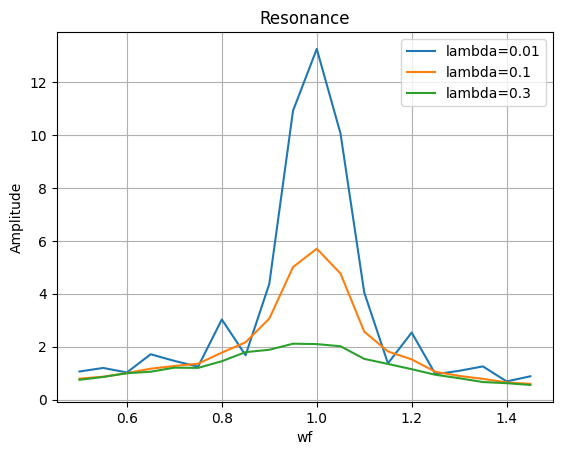

In [5]:
F0 = 1

def gen_resonance(Wfrange, gamma):
    def drive_force(t, Wf):
        return F0*np.cos(Wf*t)

    D = []
    for Wf in Wfrange:
        Y = simulate_oscillator(gamma, partial(drive_force, Wf=Wf))
        D.append(np.mean(np.abs(Y[0, int(40/dt):int(50/dt)])))

    return D

def plot_resonance():
    Wfrange = np.arange(0.5, 1.5, 0.05)
    D1 = gen_resonance(Wfrange, 0.01/(2*M)) # gamma = lambda/2M
    D2 = gen_resonance(Wfrange,  0.1/(2*M))
    D3 = gen_resonance(Wfrange,  0.3/(2*M))

    plt.figure()
    plt.plot(Wfrange, D1, label="lambda=0.01")
    plt.plot(Wfrange, D2, label="lambda=0.1")
    plt.plot(Wfrange, D3, label="lambda=0.3")
    plt.title("Resonance")
    plt.xlabel("wf")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    # plt.savefig("resonance.png")
    plt.show()

plot_resonance()

The resonance happens when $\omega_f \approx \omega_0$.

### Problem 4

#### (a)
Show that the RLC system can be described by an ODE system,

We have known that the voltage-current relationship of the RLC circuit is
$$
V_L = L\frac{dI}{dt}, V_C = \frac{Q}{C}, V_R = IR
$$
Since $V_L + V_C + V_R = E(t)$ and $I = \frac{dQ}{dt}$, we have
$$
L\frac{d^2Q}{dt^2} + R\frac{dQ}{dt} + \frac{Q}{C} = E(t) = E_0\sin(\omega t)
$$

#### (b)

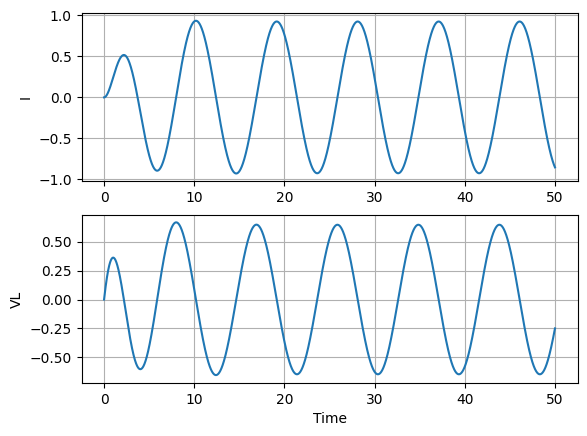

In [4]:
L = C = E0 = 1
R = 0.8
W0 = 1/np.sqrt(L*C)
gamma = R/(2*L)

def simulate_RLC(T, drive_force):
    def force_fn(t, y):
        x = y[0]
        v = y[1]
        a = -(2*gamma*v + W0*W0*x) + drive_force(t)
        return np.array([v, a])

    y0 = np.array([0, 0])
    return mysolver.solve_ivp(force_fn, (T[0], T[-1]), y0, method="RK4", t_eval=T, args=[])

def drive_force(t, Wf):
    return E0*np.sin(Wf*t) / L

def gen_RLC(T, Wf):
    return simulate_RLC(T, partial(drive_force, Wf=Wf))

def plot_RLC(name, T, Y, Wf):
    Q = Y[0, :]
    I = Y[1, :]

    VL = L*drive_force(T, Wf) - Q/C - R*I

    plt.figure()
    # subplot 1
    plt.subplot(2, 1, 1)
    plt.plot(T, I)
    plt.ylabel("I")
    plt.grid()

    # subplot 2
    plt.subplot(2, 1, 2)
    plt.plot(T, VL)
    plt.ylabel("VL")
    plt.xlabel("Time")
    plt.grid()

    # plt.savefig(f"{name}.png")
    plt.show()

T = np.arange(0, 50, 0.01)
Y = gen_RLC(T, 0.7)
plot_RLC("RLC", T, Y, 0.7)

#### (c)

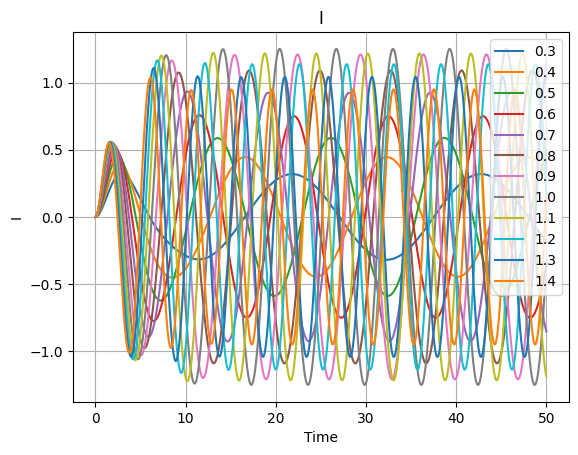

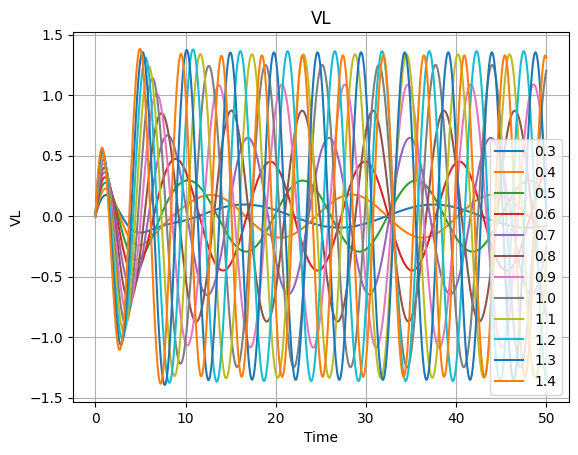

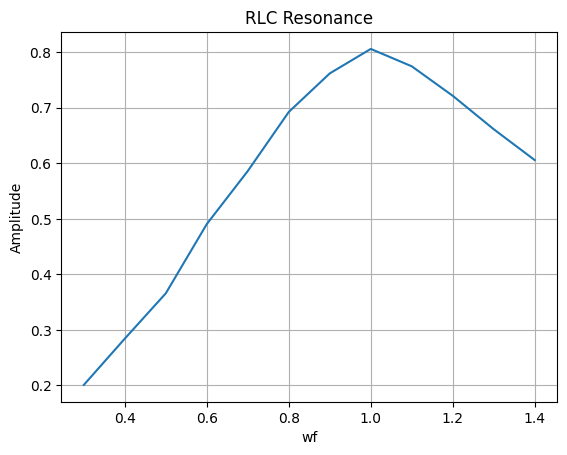

In [5]:
def plot_RLC_resonance():
    Wfrange = np.arange(0.3, 1.5, 0.1)
    dt = 0.01
    T = np.arange(0, 50, dt)

    figI = plt.figure()
    figVL = plt.figure()

    axI = figI.add_subplot(111)
    axVL = figVL.add_subplot(111)

    D = []
    for Wf in Wfrange:
        Y = gen_RLC(T, Wf)
        Q = Y[0, :]
        I = Y[1, :]
        VL = L*drive_force(T, Wf) - Q/C - R*I

        axI.plot(T, I, label=f"{Wf:0.1f}")
        axVL.plot(T, VL, label=f"{Wf:0.1f}")

        D.append(np.mean(np.abs(I[int(10/dt):int(50/dt)])))

    axI.set_title("I")
    axI.set_xlabel("Time")
    axI.set_ylabel("I")
    axI.legend()
    axI.grid()
    # figI.savefig("RLC_I.png")

    axVL.set_title("VL")
    axVL.set_xlabel("Time")
    axVL.set_ylabel("VL")
    axVL.legend()
    axVL.grid()
    # figVL.savefig("RLC_VL.png")

    plt.figure()
    plt.plot(Wfrange, D)
    plt.title("RLC Resonance")
    plt.xlabel("wf")
    plt.ylabel("Amplitude")
    plt.grid()
    # plt.savefig("RLC_resonance.png")
    plt.show()

plot_RLC_resonance()

The highiest amplitude of the charge means the resonance happens in this circuit. About $0.8\omega_0$
